In [1]:
from utils import *
import numpy as np
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# initialize random generator
rng = np.random.default_rng(seed=111)

# Datasets

In [2]:
##### Warren County...
# path to dem
warren_dem_path = r'../data/warren/dem_single_warren.tif'

# path to geologic map
warren_geo_path = r'../data/warren/geo_warren.tif'

# path to geologic map integer metadata
warren_geo_meta = r'../data/warren/geo_warren.json'

# path to geologic map GIS shapefile
warren_geo_shp_path = r'../data/warren/geo_warren.shp'


##### Hardin County
# path to dem
hardin_dem_path = r'../data/hardin/dem_single_hardin.tif'

# path to geologic map (masked to only show same geologic units as in warren county)
hardin_geo_path = r'../data/hardin/geo_hardin_masked.tif'

# path to geologic map integer metadata
hardin_geo_meta = r'../data/hardin/geo_hardin_masked.json'

# path to geologic map GIS shapefile
hardin_geo_shp_path = r'../data/hardin/geo_hardin.shp'

# Consistency Reports

In [3]:
##### Compare Warren County Datasets Geospatial/Image Metadata

with rasterio.open(warren_dem_path) as dem:
    print('Warren County DEM')
    for key, value in dem.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {dem.res}")
    print(f"Linear unit: {geotiff_linear_units(dem)}")

with rasterio.open(warren_geo_path) as geo:
    print('\nWarren County Geologic Map')
    for key, value in geo.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {geo.res}")
    print(f"Linear unit: {geotiff_linear_units(geo)}")

Warren County DEM
driver: GTiff
dtype: float32
nodata: 3.3999999521443642e+38
width: 22037
height: 18323
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4665290.00|
| 0.00,-5.00, 3570295.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot

Warren County Geologic Map
driver: GTiff
dtype: uint8
nodata: 0.0
width: 22037
height: 18323
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4665290.00|
| 0.00,-5.00, 3570295.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot


In [4]:
##### Compare Hardin County Datasets Geospatial/Image Metadata

with rasterio.open(hardin_dem_path) as dem:
    print('Hardin County DEM')
    for key, value in dem.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {dem.res}")
    print(f"Linear unit: {geotiff_linear_units(dem)}")

with rasterio.open(hardin_geo_path) as geo:
    print('\nHardin County Geologic Map')
    for key, value in geo.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {geo.res}")
    print(f"Linear unit: {geotiff_linear_units(geo)}")

Hardin County DEM
driver: GTiff
dtype: float32
nodata: 3.3999999521443642e+38
width: 45602
height: 46081
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4768395.00|
| 0.00,-5.00, 3890550.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot

Hardin County Geologic Map
driver: GTiff
dtype: uint8
nodata: 0.0
width: 45602
height: 46081
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4768395.00|
| 0.00,-5.00, 3890550.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot


# Visualizations

## Warren County

### DEM

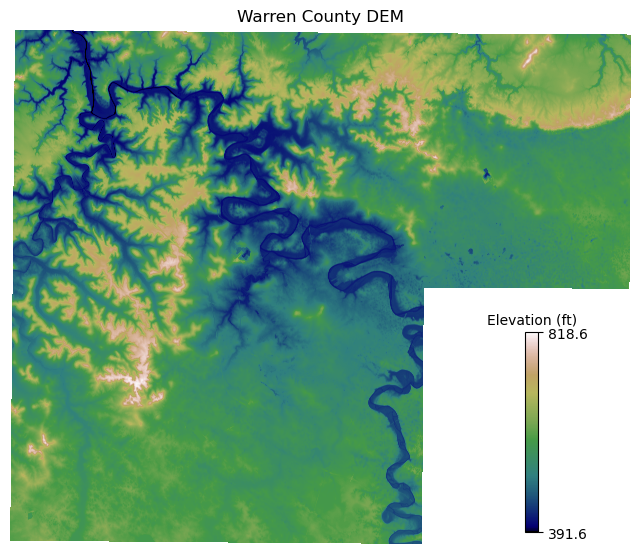

In [5]:
##### Warren County DEM

with rasterio.open(warren_dem_path) as dem:

    data = dem.read(1, masked=True)

    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.imshow(data, cmap='gist_earth')
    cbar = fig.colorbar(cax, ax=ax, ticks=None, shrink=0.3, aspect=15)
    cbar.set_ticks(ticks=[np.min(data), np.max(data)])
    cbar.ax.set_position(pos=[0.64, 0.25, 0.15, 0.2])
    cbar.ax.set_title('Elevation (ft)', fontdict={'fontsize':10, 'horizontalalignment':'center'})
    ax.set_axis_off()
    ax.set_title('Warren County DEM')
    plt.show()

### Elevation Histogram

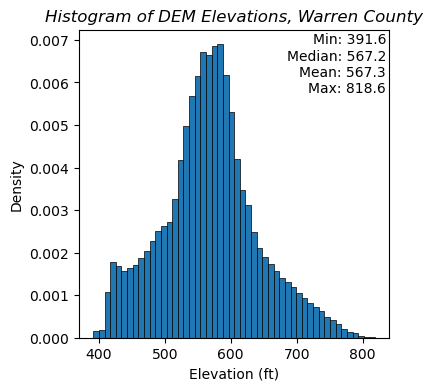

In [6]:
##### Warren County DEM Histogram

# call custom function to plot histogram of DEM elevations
plot_dem_histogram(warren_dem_path, 'Histogram of DEM Elevations, Warren County')

### Surficial Geologic Map

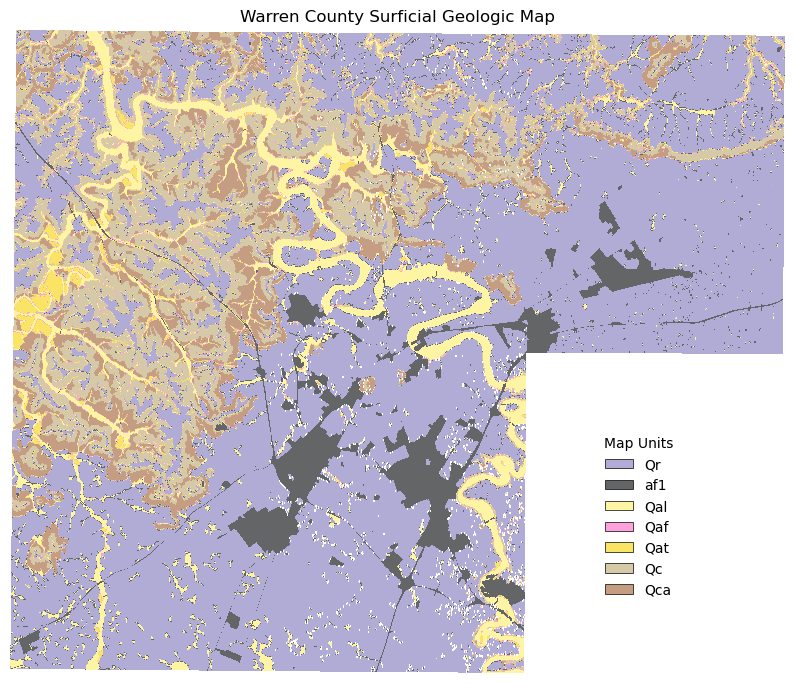

In [13]:
##### Warren County Surficial Geologic Map

# custom function for mapping string field names to encoded integers and KGS map colors
warren_codes, warren_rgb = geo_symbology_colormap(warren_geo_meta)

# open geologic map image and plot...
with rasterio.open(warren_geo_path) as geo:

    # read data (mask nodata values)
    data = geo.read(1, masked=True)

    # plot image...
    fig, ax = plt.subplots(figsize=(10,10))

    cmap = plt.matplotlib.colors.ListedColormap([warren_rgb[key] for key in warren_codes.keys()])
    ax.imshow(data, cmap=cmap)

    # create custom legend items
    handles = [mpatches.Patch(facecolor=warren_rgb[key], edgecolor='k', linewidth=0.5, label=warren_codes[key]) for key in warren_codes.keys()]
    ax.legend(handles=handles, bbox_to_anchor=(0.75, 0.1), loc='lower left', frameon=False, title='Map Units')

    # adjust plot elements
    ax.set_axis_off()
    ax.set_title('Warren County Surficial Geologic Map')
    plt.show()

### Class Distribution & Statistics

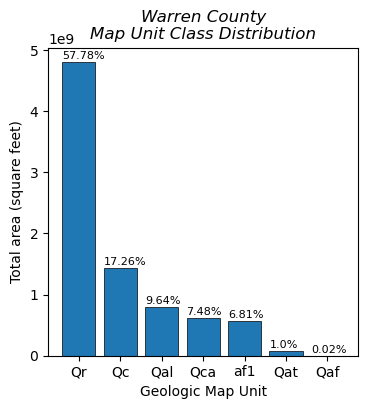

In [4]:
##### Warren County Geologic Map Unit Class Distribution

# custom function to get dictionary of geologic map unit name and total geographic area
names_areas = total_class_area(warren_geo_path, warren_codes)

##### plot class distributions (by total area in map)...
fig, ax = plt.subplots(figsize=(4,4))

# get data for bar chart...
x = range(1, len(names_areas) + 1)                          # number of classes
areas = list(names_areas.values())                          # list of total class geographic areas
percentages = [area / sum(areas) * 100 for area in areas]   # list of class area percentage
tick_labels = list(names_areas.keys())                      # list of map unit names for ticks

# plot bar chart
bars = ax.bar(x=x, height=areas, tick_label=tick_labels, align='center', linewidth=0.5, edgecolor='k')

# plot area percentage text on top of each bar
for bar, percent in zip(bars, percentages):
    yval = bar.get_height()
    ax.text(x=bar.get_x(), y=yval+float(0.05e9), s=str(round(percent, 2))+'%', fontsize=8)

# customize plot elements
ax.set_xlabel('Geologic Map Unit')
ax.set_ylabel('Total area (square feet)')
ax.set_title('Warren County\nMap Unit Class Distribution', style='italic')

plt.show()

In [9]:
###### Warren County class statistics

# read GIS shapefile as geodataframe (easier to calculate class statistics than with raster)
gdf = gpd.read_file(warren_geo_shp_path)

# get area (geographic and minimum bounding box dimensions (width and height) for each polygon
gdf = get_polygon_metrics(gdf, spatial_resolution=5)

# calculate statistics for each class...
for unit in gdf['Symbol'].unique():

    # mask for class/geologic unit
    unit_mask = gdf['Symbol'] == unit

    # calculate statistics...
    min_area = gdf.loc[unit_mask, 'area'].min()          # minimum area
    median_area = gdf.loc[unit_mask, 'area'].median()    # media area
    mean_area = gdf.loc[unit_mask, 'area'].mean()        # mean area
    max_area = gdf.loc[unit_mask, 'area'].max()          # maximum area

    # get index for median area polygon
    median_idx = (gdf.loc[unit_mask, 'area'] - median_area).abs().idxmin()

    # print statistics...
    print(unit)
    print('Minimum Area (sq. ft.): ', round(min_area, 1))
    print('Median Area (sq. ft.): ', round(median_area, 1))
    print('Mean Area (sq. ft.): ', round(mean_area, 1))
    print('Maximum Area (sq. ft.): ', round(max_area, 1))

    # bounding box width and height for median area polygon
    print('Median Area Bounding Box Width (pixels): ', round(gdf.loc[median_idx, 'min_box_width'], 1))
    print('Median Area Bounding Box Height (pixels): ', round(gdf.loc[median_idx, 'min_box_height'], 1))
    
    print('\n')

Qr
Minimum Area (sq. ft.):  1584.8
Median Area (sq. ft.):  393155.3
Mean Area (sq. ft.):  9265508.9
Maximum Area (sq. ft.):  1237669732.3
Median Area Bounding Box Width (pixels):  189.4
Median Area Bounding Box Height (pixels):  158.6


af1
Minimum Area (sq. ft.):  2722.5
Median Area (sq. ft.):  43631.3
Mean Area (sq. ft.):  1679108.1
Maximum Area (sq. ft.):  349277696.7
Median Area Bounding Box Width (pixels):  168.3
Median Area Bounding Box Height (pixels):  47.2


Qal
Minimum Area (sq. ft.):  666.7
Median Area (sq. ft.):  47074.0
Mean Area (sq. ft.):  404524.1
Maximum Area (sq. ft.):  336669223.2
Median Area Bounding Box Width (pixels):  71.4
Median Area Bounding Box Height (pixels):  36.9


Qaf
Minimum Area (sq. ft.):  5000.5
Median Area (sq. ft.):  22793.3
Mean Area (sq. ft.):  36282.7
Maximum Area (sq. ft.):  235409.6
Median Area Bounding Box Width (pixels):  54.0
Median Area Bounding Box Height (pixels):  45.4


Qat
Minimum Area (sq. ft.):  11635.5
Median Area (sq. ft.):  244418

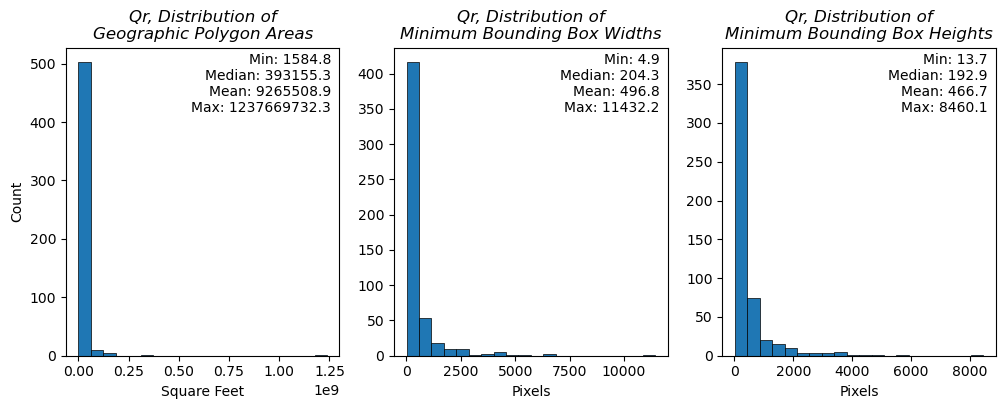

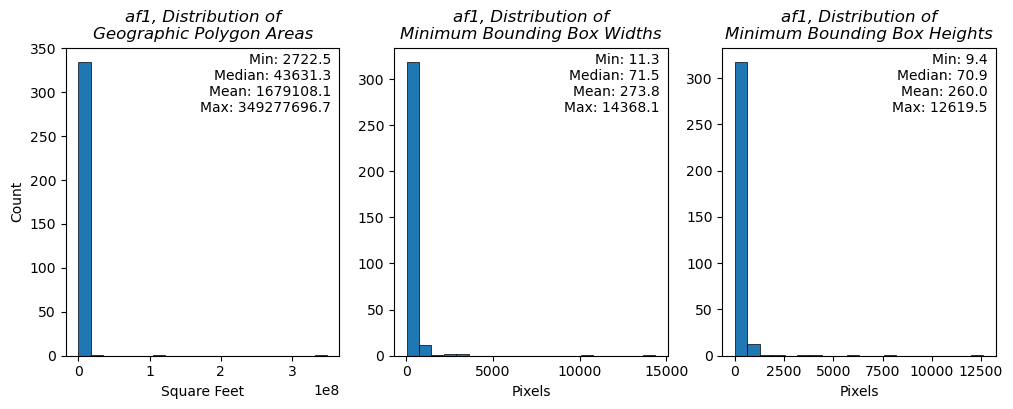

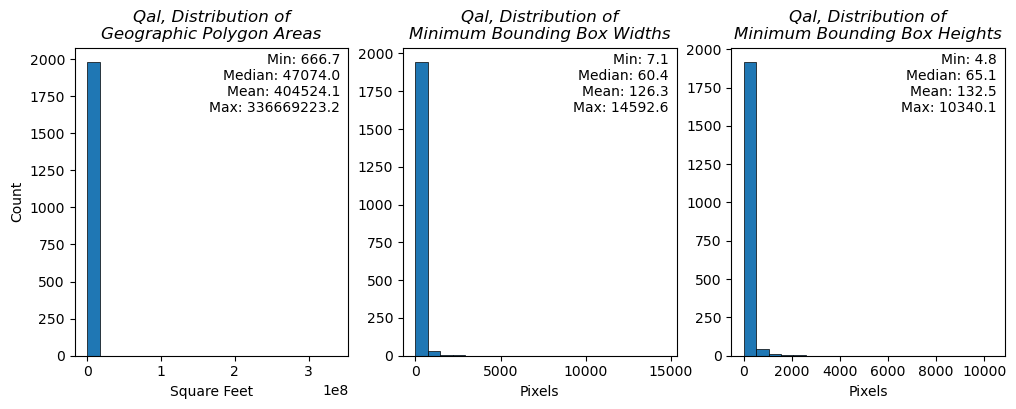

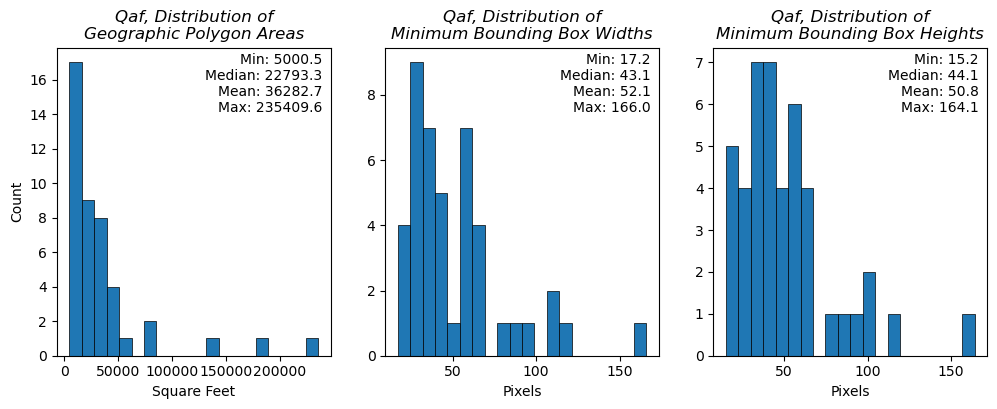

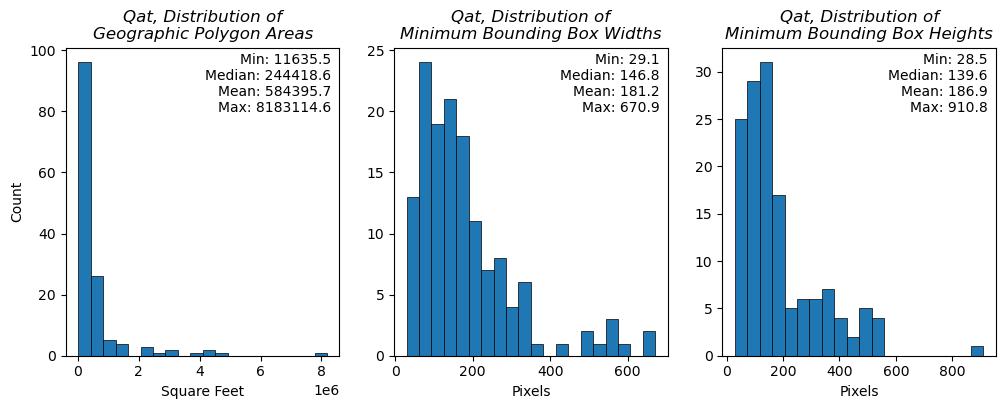

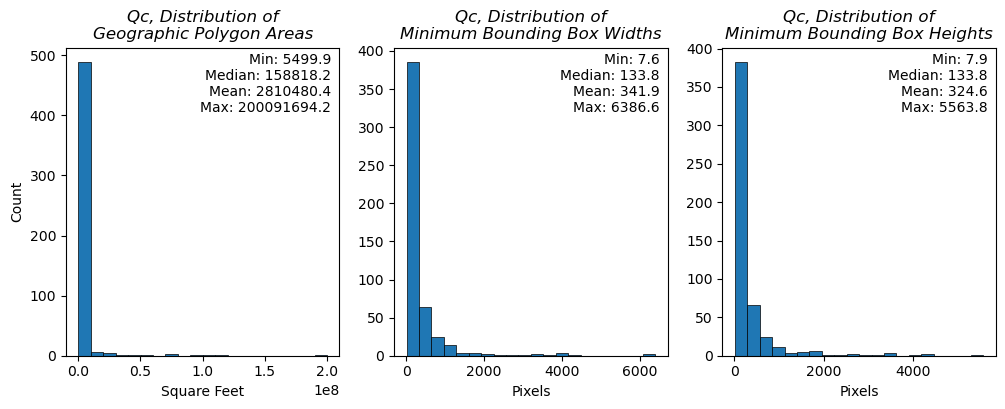

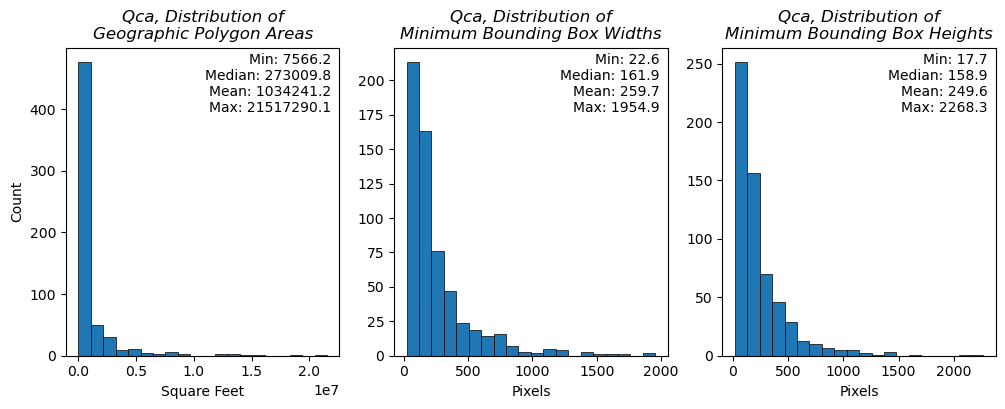

In [10]:
##### Histograms of Polygon Areas and Minimum Bounding Box Widths and Heights

# iterate through each class sorted by area...
for name in gdf['Symbol'].unique():

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    # plot histogram for area and minimum bounding box widths and heights...
    for idx, field in enumerate(['area', 'min_box_width', 'min_box_height']):
        
        # mask for current unique map unit class
        name_mask = gdf['Symbol'] == name

        # get current column (area, min_box_width, or min_box_height)
        col = gdf.columns[4+idx]

        # calculate statistics for current class and column
        min_col = gdf.loc[name_mask, col].min()
        median_col = gdf.loc[name_mask, col].median()
        mean_col = gdf.loc[name_mask, col].mean()
        max_col = gdf.loc[name_mask, col].max()

        # plot histogram
        ax[idx].hist(gdf.loc[gdf['Symbol']==name, field], bins=20, align='mid', linewidth=0.5, edgecolor='k')

        # create label for statistics
        label = f"Min: {round(min_col,1)}\nMedian: {round(median_col,1)}\nMean: {round(mean_col,1)}\nMax: {round(max_col,1)}"

        # plot statistics as text on histogram
        ax[idx].text(x=0.97, y=0.79, s=label, transform=ax[idx].transAxes, horizontalalignment='right')

    # customize plot...
    ax[0].set_title(f"{name}, Distribution of\nGeographic Polygon Areas", style='italic')
    ax[0].set_xlabel('Square Feet')
    ax[0].set_ylabel('Count')

    ax[1].set_title(f"{name}, Distribution of\nMinimum Bounding Box Widths", style='italic')
    ax[1].set_xlabel('Pixels')
    
    ax[2].set_title(f"{name}, Distribution of\nMinimum Bounding Box Heights", style='italic')
    ax[2].set_xlabel('Pixels')

    plt.show()

### Random Examples

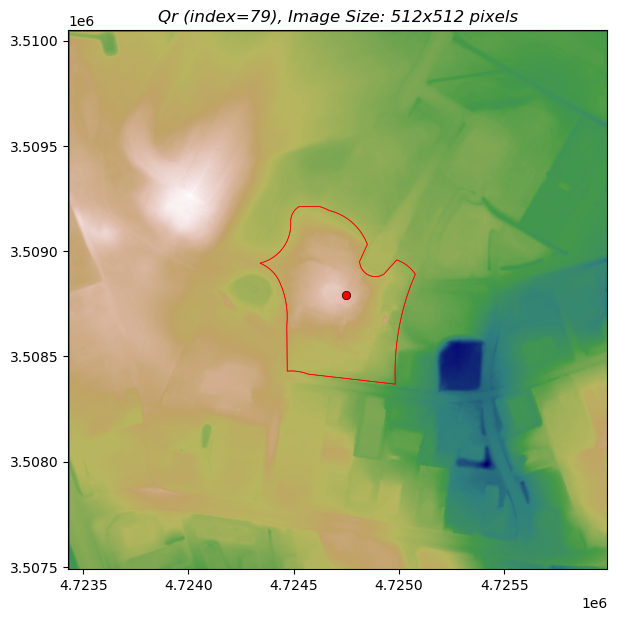

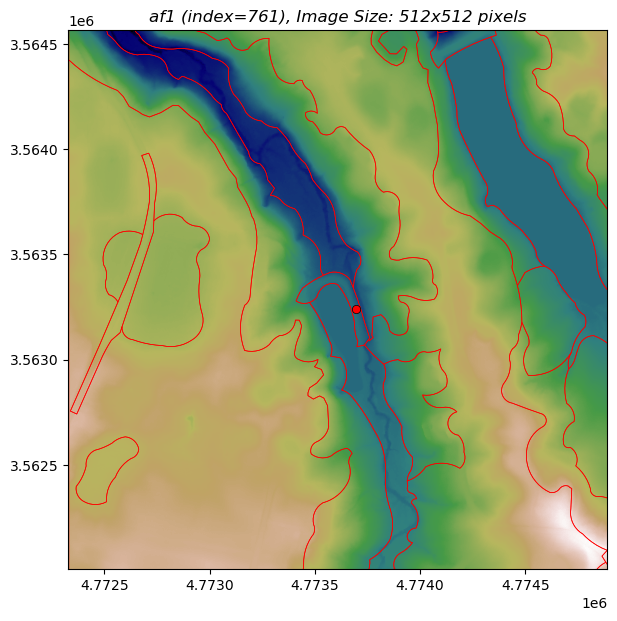

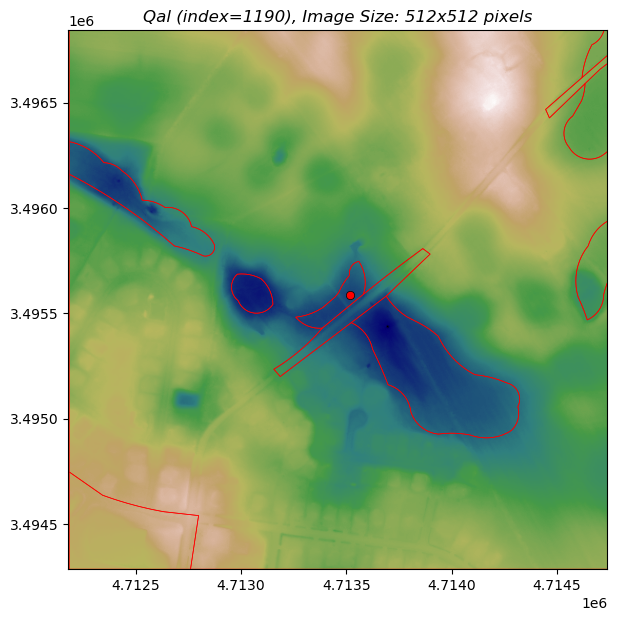

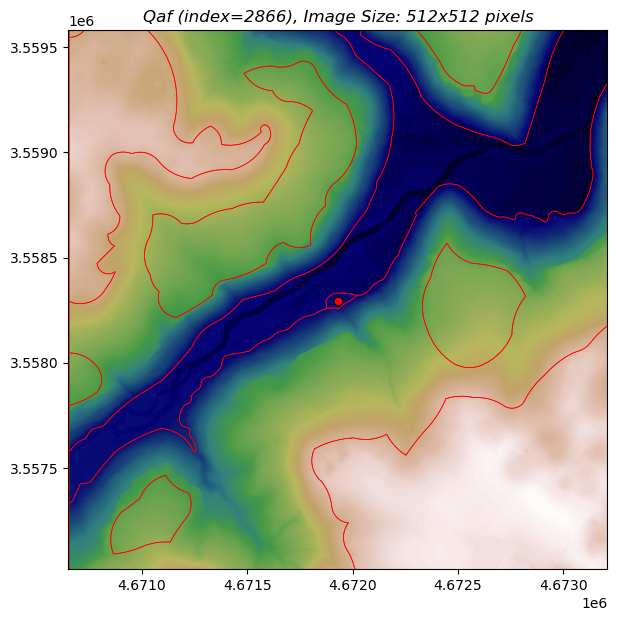

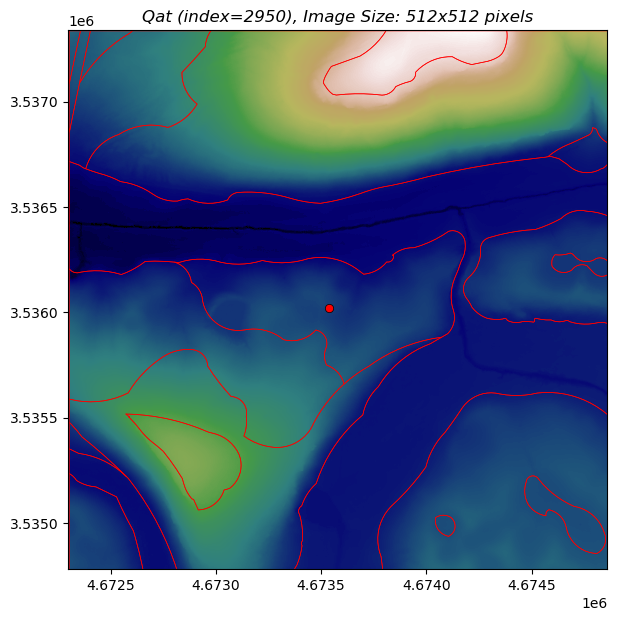

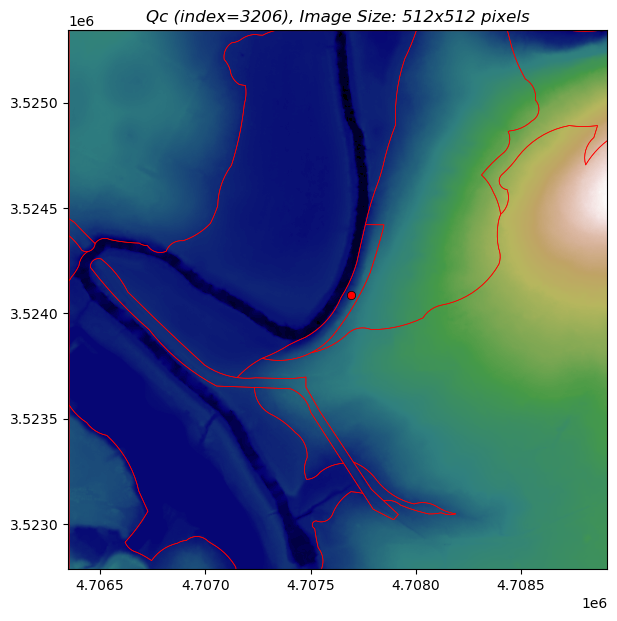

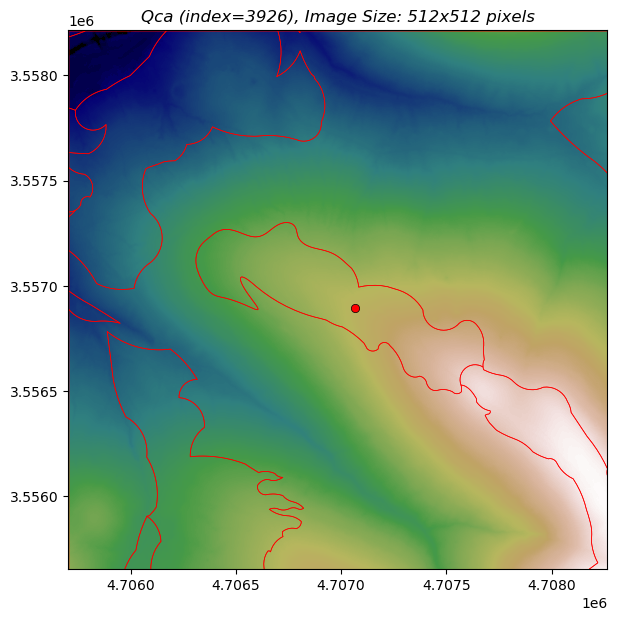

In [6]:
##### Plot Random Polygons and DEM of Specified Size

# choose patch size (in pixels)
patch_size = 512

# read geologic map as geodataframe
gdf = gpd.read_file(warren_geo_shp_path)

# iterate through all unique geologic map unit classes
for name in gdf['Symbol'].unique():

    # get subset gdf for specific class
    gdf_subset = gdf[gdf['Symbol'] == name].copy()

    # generate random index of subset
    random_idx = rng.choice(gdf_subset.index, size=1)[0]
    # random_idx = 844

    # get centroid of randomly chosen polygon
    # Note: centroid represents center of mass of polygon and may not always fall within polygon
    centroid = gdf.loc[random_idx, 'geometry'].centroid

    # call custom function to extract patch of dem of specified size centered on chosen polygon
    patch, transform = extract_patch(warren_dem_path, centroid, patch_size)

    # call custom function to clip shapefile to patch size
    gdf_patch = clip_shapefile_to_patch(gdf, centroid, patch_size, patch_size, spatial_resolution=5)

    # Note: extract_patch and/or clip_shapefile_to_patch do not handle edge cases where selected polygon is along a dataset boundary; the patches do not align properly

    # plot DEM patch, outline of polygons, and centroid of random polygon...
    fig, ax = plt.subplots(figsize=(7,7))

    # use Rasterio.plot.show to plot DEM patch in geographic coordinates
    show(patch, ax=ax, transform=transform, cmap='gist_earth')

    # plot outlines of geologic map units from extracted shapefile patch
    gdf_patch.boundary.plot(ax=ax, color='red', linewidth=0.5)

    # plot representative point of randomly selected polygon (always falls within polygon unlike centroid)
    rep_point = gdf.loc[random_idx].geometry.representative_point()
    ax.plot(rep_point.x, rep_point.y, marker='o', markeredgecolor='k', markeredgewidth=0.5, markerfacecolor='red')

    # get polygon name/Symbol
    poly_name = gdf.loc[random_idx, 'Symbol']

    # set plot title as polygon symbol name and index number
    ax.set_title(f"{poly_name} (index={random_idx}), Image Size: {patch_size}x{patch_size} pixels", style='italic')

    plt.show()

## Hardin County

### DEM

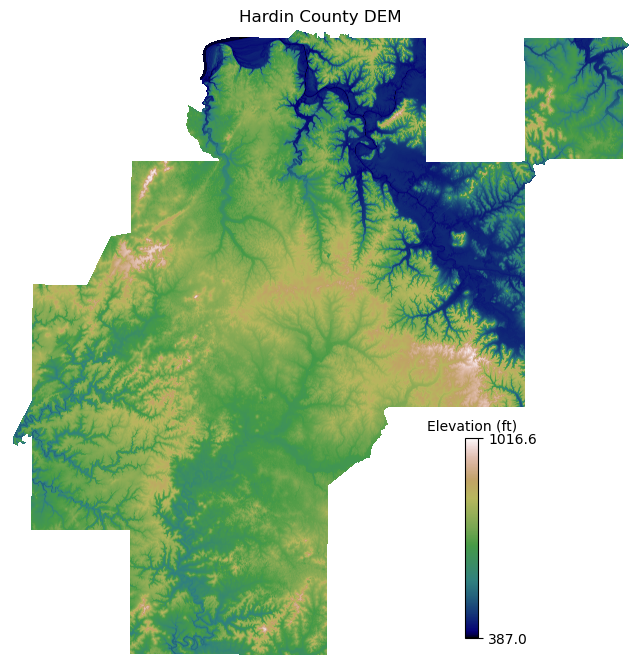

In [11]:
##### Hardin County DEM

with rasterio.open(hardin_dem_path) as dem:

    data = dem.read(1, masked=True)

    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.imshow(data, cmap='gist_earth')
    cbar = fig.colorbar(cax, ax=ax, ticks=None, shrink=0.3, aspect=15)
    cbar.set_ticks(ticks=[np.min(data), np.max(data)])
    cbar.ax.set_position(pos=[0.58, 0.2, 0.15, 0.2])
    cbar.ax.set_title('Elevation (ft)', fontdict={'fontsize':10, 'horizontalalignment':'center'})
    ax.set_axis_off()
    ax.set_title('Hardin County DEM')
    plt.show()

### Elevation Histogram

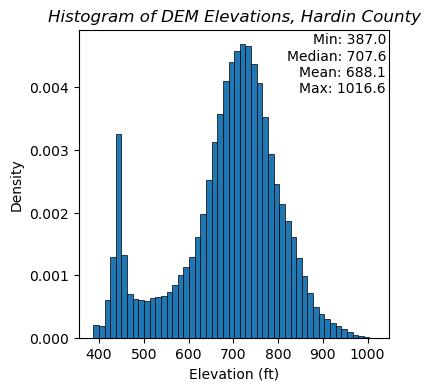

In [12]:
##### Hardin County DEM Histogram

plot_dem_histogram(hardin_dem_path, 'Histogram of DEM Elevations, Hardin County')

### Surficial Geologic Map

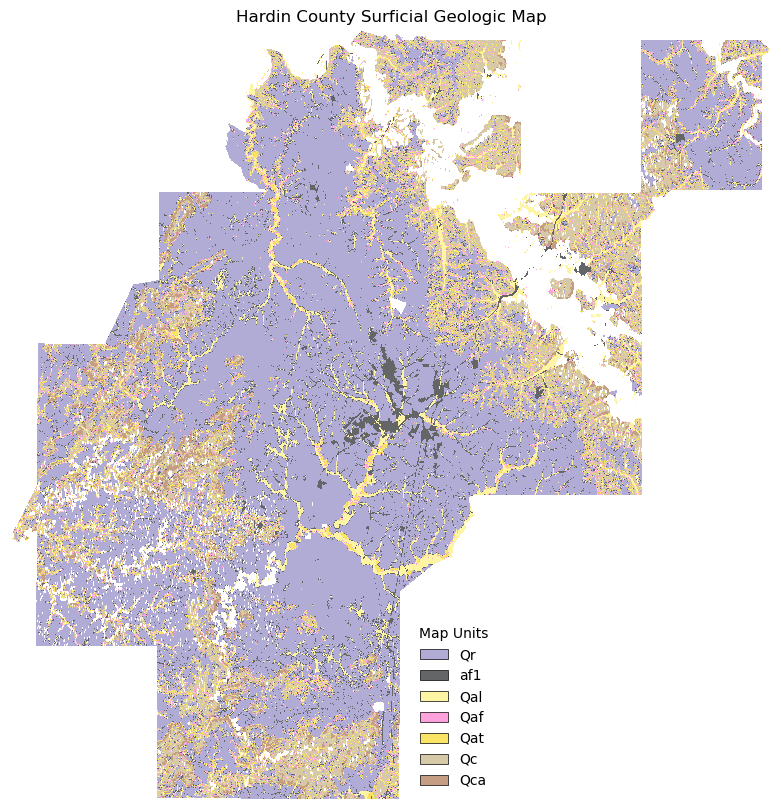

In [17]:
##### Hardin County Surficial Geologic Map

# open geologic map image and plot...
with rasterio.open(hardin_geo_path) as geo:

    # read data (mask nodata values)
    data = geo.read(1, masked=True)

    # plot image...
    fig, ax = plt.subplots(figsize=(10,10))

    # plot surficial geologic map image using colormap for warren county 
    ax.imshow(data, cmap=cmap)

    # create custom legend items...
    handles = [mpatches.Patch(facecolor=warren_rgb[key], edgecolor='k', linewidth=0.5, label=warren_codes[key]) for key in warren_codes.keys()]
    ax.legend(handles=handles, bbox_to_anchor=(0.52, 0), loc='lower left', frameon=False, title='Map Units')

    # adjust plot elements
    ax.set_axis_off()
    ax.set_title('Hardin County Surficial Geologic Map')
    
    plt.show()

### Class Distribution & Statistics

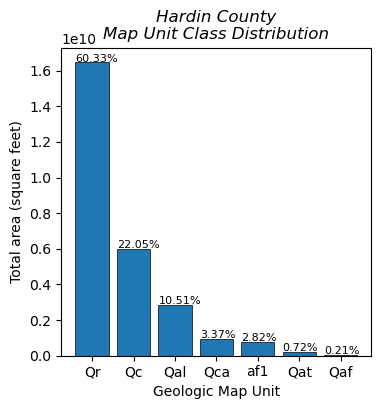

In [18]:
##### Hardin County Geologic Map Unit Class Distribution

# custom function to get dictionary of geologic map unit name and total geographic area;
# using warren_codes because hardin is masked to only include warren county map units
names_areas = total_class_area(hardin_geo_path, warren_codes)

##### plot class distributions (by total area in map)...
fig, ax = plt.subplots(figsize=(4,4))

# get data for bar chart...
x = range(1, len(names_areas) + 1)                          # number of classes
areas = list(names_areas.values())                          # list of total class geographic areas
percentages = [area / sum(areas) * 100 for area in areas]   # list of class area percentage
tick_labels = list(names_areas.keys())                      # list of map unit names for ticks

# plot bar chart
bars = ax.bar(x=x, height=areas, tick_label=tick_labels, align='center', linewidth=0.5, edgecolor='k')

# plot area percentage text on top of each bar
for bar, percent in zip(bars, percentages):
    yval = bar.get_height()
    ax.text(x=bar.get_x(), y=yval+float(0.05e9), s=str(round(percent, 2))+'%', fontsize=8)

# customize plot elements
ax.set_xlabel('Geologic Map Unit')
ax.set_ylabel('Total area (square feet)')
ax.set_title('Hardin County\nMap Unit Class Distribution', style='italic')

plt.show()

In [21]:
###### Hardin County class statistics

# read GIS shapefile as geodataframe (easier to calculate class statistics than with raster)
gdf = gpd.read_file(hardin_geo_shp_path)

# get area (geographic and minimum bounding box dimensions (width and height) for each polygon
gdf = get_polygon_metrics(gdf, spatial_resolution=5)

# calculate statistics for each class (only looking at warren county map units in hardin county)...
for unit in warren_codes.values():

    # mask for class/geologic unit
    unit_mask = gdf['Symbol'] == unit

    # calculate statistics...
    min_area = gdf.loc[unit_mask, 'area'].min()          # minimum area
    median_area = gdf.loc[unit_mask, 'area'].median()    # media area
    mean_area = gdf.loc[unit_mask, 'area'].mean()        # mean area
    max_area = gdf.loc[unit_mask, 'area'].max()          # maximum area

    # get index for median area polygon
    median_idx = (gdf.loc[unit_mask, 'area'] - median_area).abs().idxmin()

    # print statistics...
    print(unit)
    print('Minimum Area (sq. ft.): ', round(min_area, 1))
    print('Median Area (sq. ft.): ', round(median_area, 1))
    print('Mean Area (sq. ft.): ', round(mean_area, 1))
    print('Maximum Area (sq. ft.): ', round(max_area, 1))

    # bounding box width and height for median area polygon
    print('Median Area Bounding Box Width (pixels): ', round(gdf.loc[median_idx, 'min_box_width'], 1))
    print('Median Area Bounding Box Height (pixels): ', round(gdf.loc[median_idx, 'min_box_height'], 1))
    
    print('\n')

Qr
Minimum Area (sq. ft.):  2631.9
Median Area (sq. ft.):  197952.6
Mean Area (sq. ft.):  6707361.3
Maximum Area (sq. ft.):  4696970197.6
Median Area Bounding Box Width (pixels):  176.0
Median Area Bounding Box Height (pixels):  92.2


af1
Minimum Area (sq. ft.):  1563.8
Median Area (sq. ft.):  40861.1
Mean Area (sq. ft.):  416158.4
Maximum Area (sq. ft.):  219105326.7
Median Area Bounding Box Width (pixels):  124.4
Median Area Bounding Box Height (pixels):  46.7


Qal
Minimum Area (sq. ft.):  455.1
Median Area (sq. ft.):  64268.5
Mean Area (sq. ft.):  464769.9
Maximum Area (sq. ft.):  426508093.7
Median Area Bounding Box Width (pixels):  158.9
Median Area Bounding Box Height (pixels):  177.8


Qaf
Minimum Area (sq. ft.):  4834.9
Median Area (sq. ft.):  40511.3
Mean Area (sq. ft.):  86111.9
Maximum Area (sq. ft.):  2351867.3
Median Area Bounding Box Width (pixels):  58.7
Median Area Bounding Box Height (pixels):  68.7


Qat
Minimum Area (sq. ft.):  5294.1
Median Area (sq. ft.):  124923

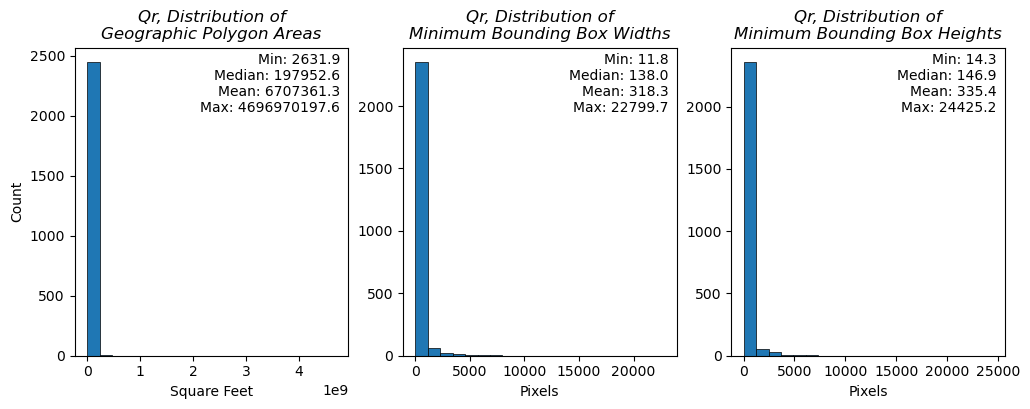

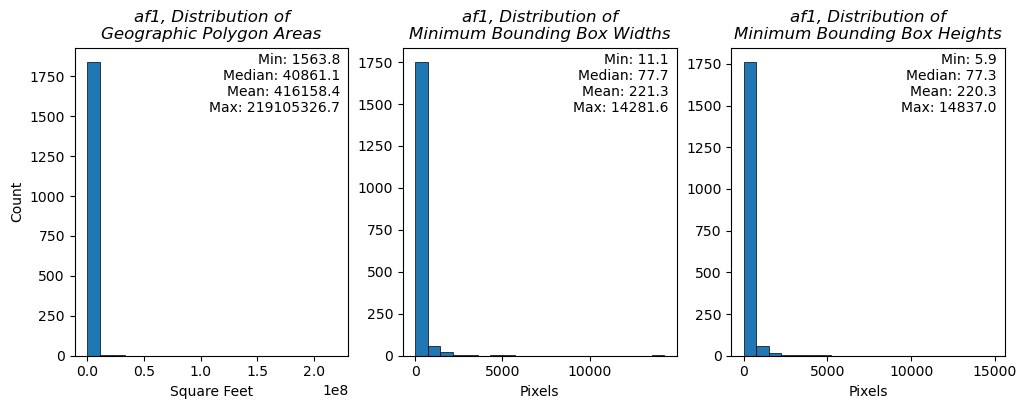

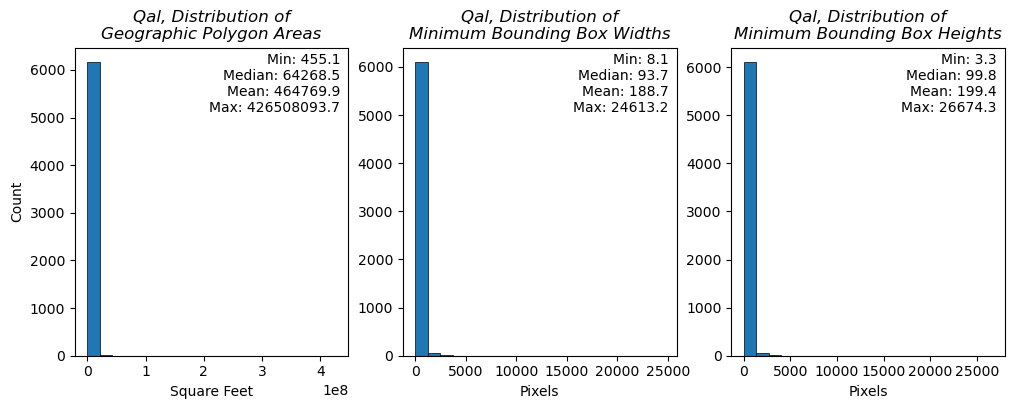

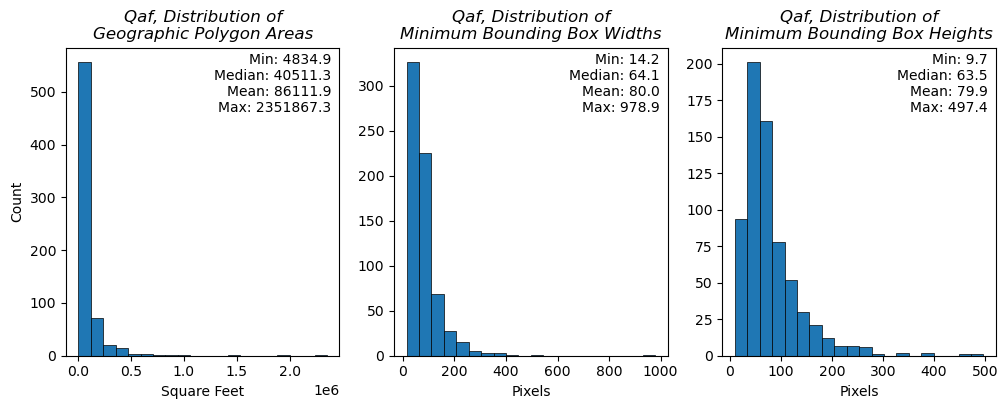

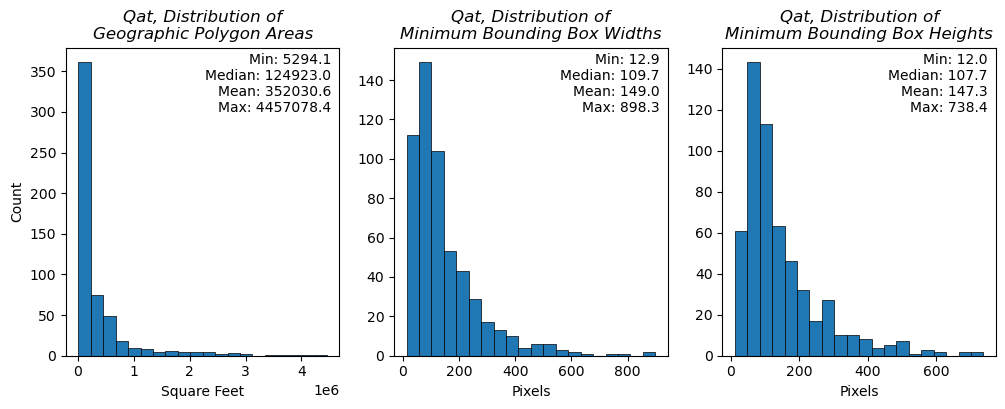

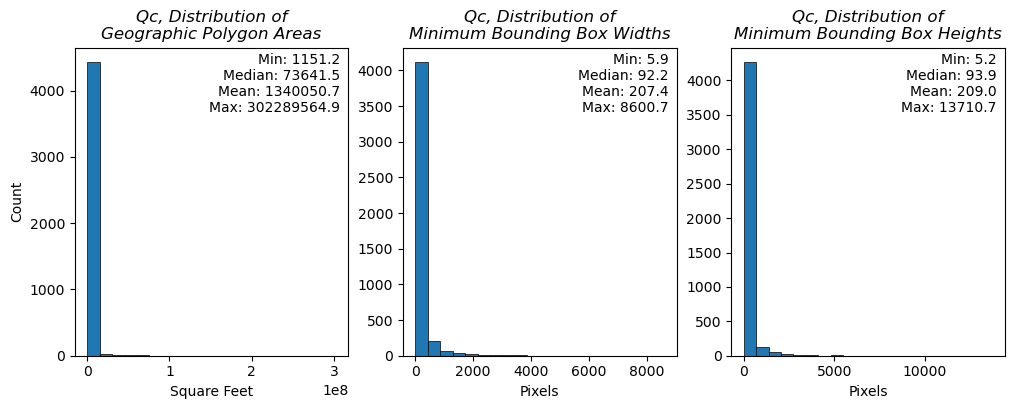

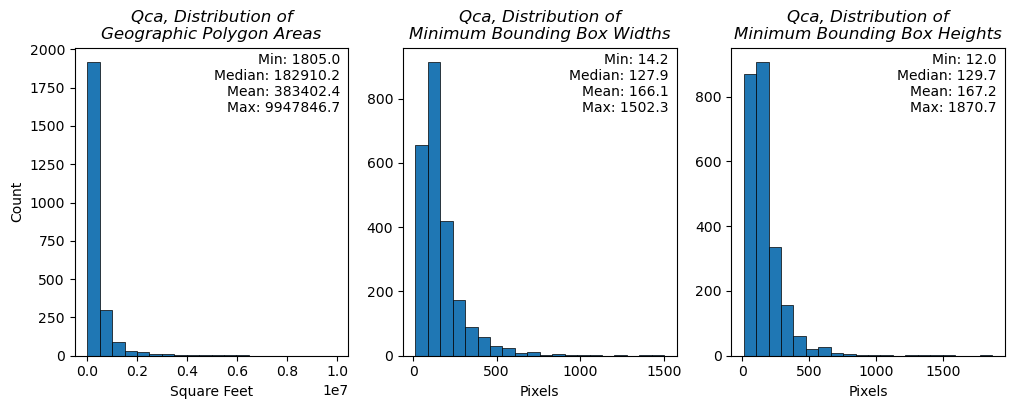

In [22]:
##### Histograms of Polygon Areas and Minimum Bounding Box Widths and Heights

# iterate through each class (only those in warren county) sorted by area...
for name in warren_codes.values():

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    # plot histogram for area and minimum bounding box widths and heights...
    for idx, field in enumerate(['area', 'min_box_width', 'min_box_height']):
        
        # mask for current unique map unit class
        name_mask = gdf['Symbol'] == name

        # get current column (area, min_box_width, or min_box_height)
        col = gdf.columns[4+idx]

        # calculate statistics for current class and column
        min_col = gdf.loc[name_mask, col].min()
        median_col = gdf.loc[name_mask, col].median()
        mean_col = gdf.loc[name_mask, col].mean()
        max_col = gdf.loc[name_mask, col].max()

        # plot histogram
        ax[idx].hist(gdf.loc[gdf['Symbol']==name, field], bins=20, align='mid', linewidth=0.5, edgecolor='k')

        # create label for statistics
        label = f"Min: {round(min_col,1)}\nMedian: {round(median_col,1)}\nMean: {round(mean_col,1)}\nMax: {round(max_col,1)}"

        # plot statistics as text on histogram
        ax[idx].text(x=0.97, y=0.79, s=label, transform=ax[idx].transAxes, horizontalalignment='right')

    # customize plot...
    ax[0].set_title(f"{name}, Distribution of\nGeographic Polygon Areas", style='italic')
    ax[0].set_xlabel('Square Feet')
    ax[0].set_ylabel('Count')

    ax[1].set_title(f"{name}, Distribution of\nMinimum Bounding Box Widths", style='italic')
    ax[1].set_xlabel('Pixels')
    
    ax[2].set_title(f"{name}, Distribution of\nMinimum Bounding Box Heights", style='italic')
    ax[2].set_xlabel('Pixels')

    plt.show()

### Random Examples

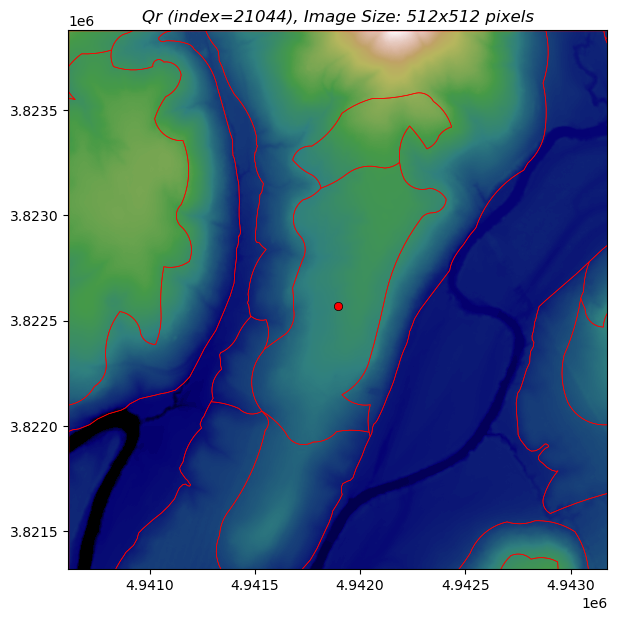

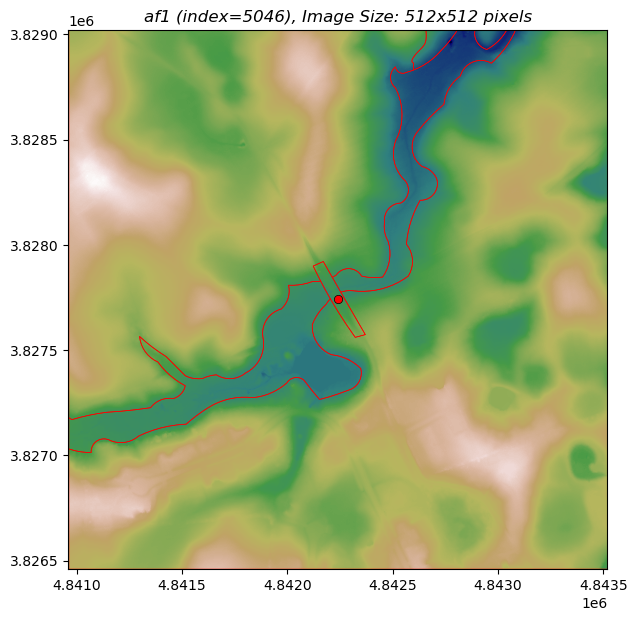

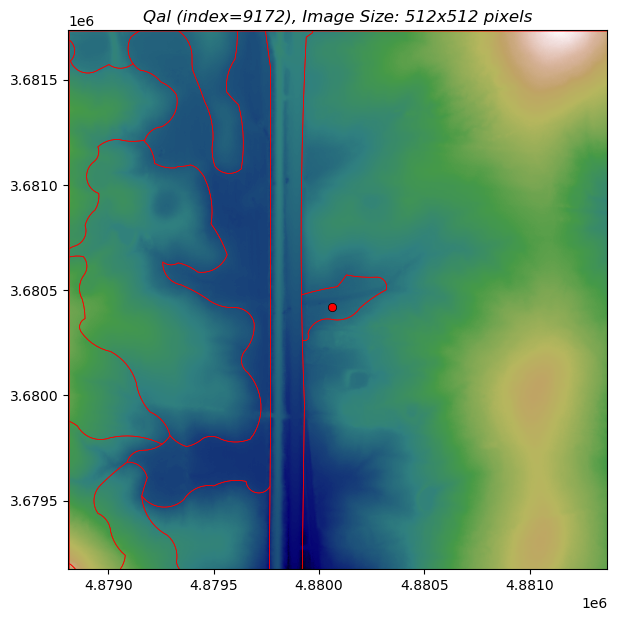

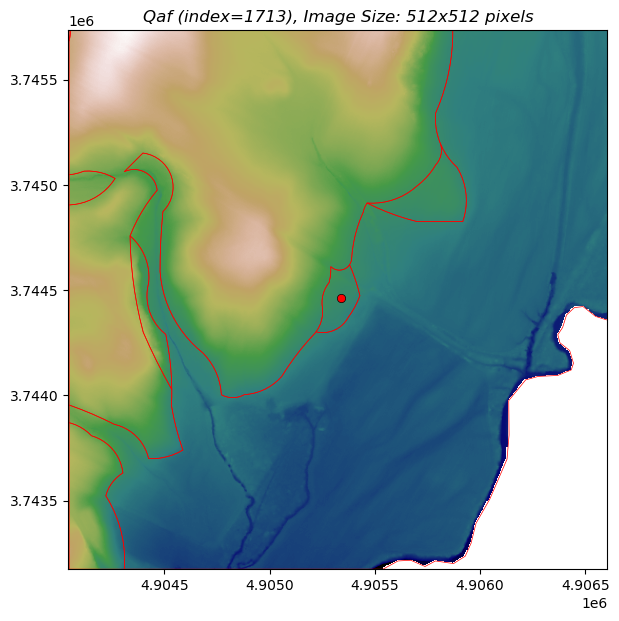

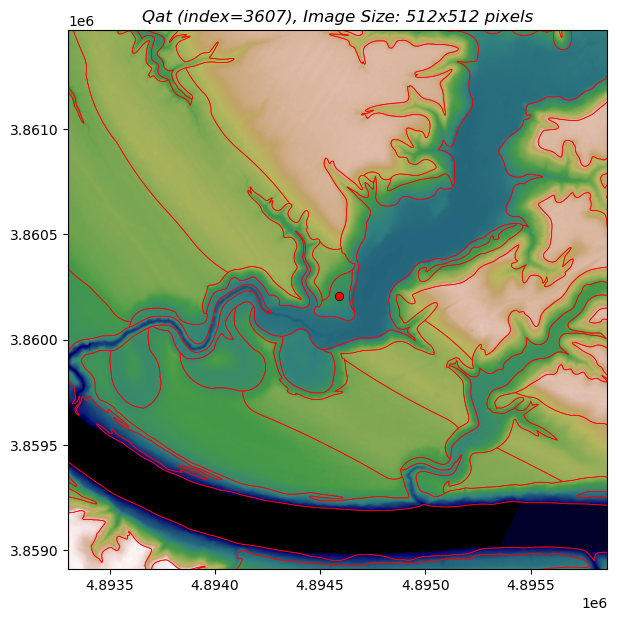

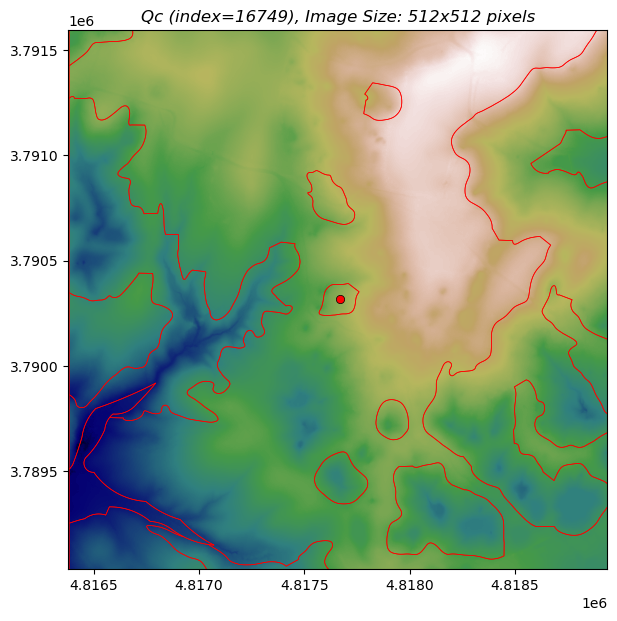

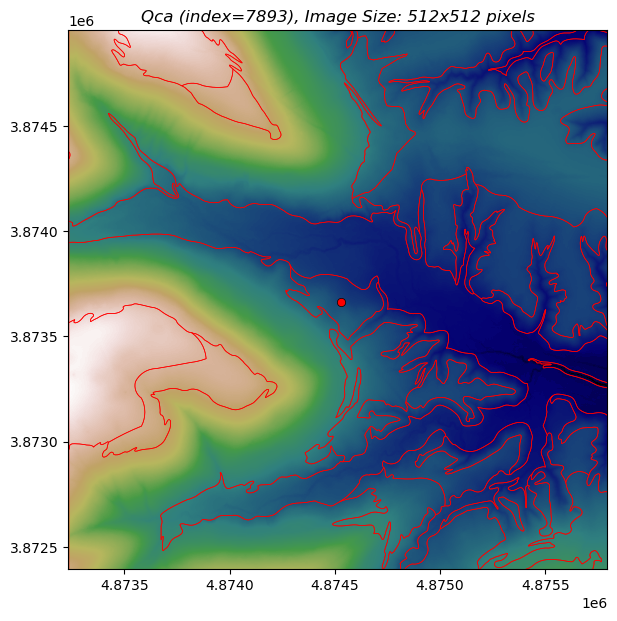

In [24]:
##### Plot Random Polygons and DEM of Specified Size

# choose patch size (in pixels)
patch_size = 512

# read geologic map as geodataframe
gdf = gpd.read_file(hardin_geo_shp_path)

# iterate through all unique geologic map unit classes
for name in warren_codes.values():

    # get subset gdf for specific class
    gdf_subset = gdf[gdf['Symbol'] == name].copy()

    # generate random index of subset
    random_idx = rng.choice(gdf_subset.index, size=1)[0]

    # get centroid of randomly chosen polygon
    # Note: centroid represents center of mass of polygon and may not always fall within polygon
    centroid = gdf.loc[random_idx, 'geometry'].centroid

    # call custom function to extract patch of dem of specified size centered on chosen polygon
    patch, transform = extract_patch(hardin_dem_path, centroid, patch_size)

    # call custom function to clip shapefile to patch size
    gdf_patch = clip_shapefile_to_patch(gdf, centroid, patch_size, patch_size, spatial_resolution=5)

    # Note: extract_patch and/or clip_shapefile_to_patch do not handle edge cases where selected polygon is along a dataset boundary; the patches do not align properly

    # plot DEM patch, outline of polygons, and centroid of random polygon...
    fig, ax = plt.subplots(figsize=(7,7))

    # use Rasterio.plot.show to plot DEM patch in geographic coordinates
    show(patch, ax=ax, transform=transform, cmap='gist_earth')

    # plot outlines of geologic map units from extracted shapefile patch
    gdf_patch.boundary.plot(ax=ax, color='red', linewidth=0.5)

    # plot representative point of randomly selected polygon (always falls within polygon unlike centroid)
    rep_point = gdf.loc[random_idx].geometry.representative_point()
    ax.plot(rep_point.x, rep_point.y, marker='o', markeredgecolor='k', markeredgewidth=0.5, markerfacecolor='red')

    # get polygon name/Symbol
    poly_name = gdf.loc[random_idx, 'Symbol']

    # set plot title as polygon symbol name and index number
    ax.set_title(f"{poly_name} (index={random_idx}), Image Size: {patch_size}x{patch_size} pixels", style='italic')

    plt.show()